In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy as spy

In [2]:
columns = [
    "R_fighter",
    "B_fighter",
    "Winner","weight_class",
    "no_of_rounds",
    "B_wins", 
    "R_wins", 
    "B_losses", 
    "R_losses", 
    "B_age", 
    "R_age", 
    "R_Height_cms",
    "R_Reach_cms",
    "R_Weight_lbs",
    "B_Height_cms",
    "B_Reach_cms",
    "B_Weight_lbs",
    "R_win_by_Submission",
    "R_win_by_Decision_Majority",
    "R_win_by_Decision_Split",
    "R_win_by_Decision_Unanimous",
    "R_win_by_KO/TKO",
    "R_win_by_TKO_Doctor_Stoppage",
    "B_win_by_Submission",
    "B_win_by_Decision_Majority",
    "B_win_by_Decision_Split",
    "B_win_by_Decision_Unanimous",
    "B_win_by_KO/TKO",
    "B_win_by_TKO_Doctor_Stoppage"]
data = pd.read_csv("ufcdata/data.csv",encoding='latin-1', usecols=columns)
data.head()

,R_fighter,B_fighter,Winner,weight_class,no_of_rounds,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Red,Bantamweight,5,1.0,0.0,1.0,0.0,2.0,...,4.0,2.0,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Red,Women's Flyweight,5,6.0,0.0,2.0,1.0,0.0,...,2.0,0.0,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Red,Lightweight,3,8.0,0.0,0.0,7.0,10.0,...,3.0,3.0,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Blue,Bantamweight,3,0.0,0.0,0.0,2.0,2.0,...,4.0,1.0,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Blue,Heavyweight,3,1.0,0.0,0.0,1.0,0.0,...,1.0,2.0,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0


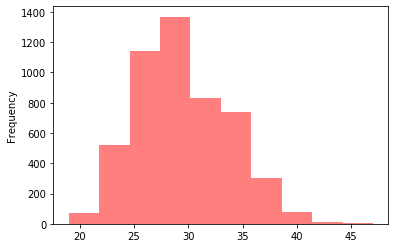

In [3]:
data["R_age"].plot.hist(bins=10, alpha=0.5, color='red')

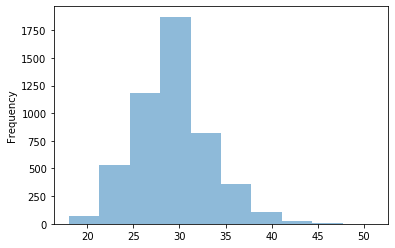

In [4]:
data["B_age"].plot.hist(bins=10, alpha=0.5)

In [9]:
nomeR = data["B_fighter"] == "Henry Cejudo"
pimba = data[nomeR]["B_wins"]
pey = data[nomeR]["B_wins"].max()
final = data[nomeR]["B_wins"] == pey
print("value = ",data[nomeR][final]["Winner"])
#pey = data[nomeR][pimba]
#pimba = data[nomeR][pey]
#data["R_wins"]
#nome = max(max(nomeR["R_wins"]),max(nomeB["B_wins"]))

value =  412    Blue
Name: Winner, dtype: object


In [23]:
dec = 0
sub = 0
ko = 0
types = data.copy()
types.dropna()
for name in types["R_fighter"]:
    name_R = types["R_fighter"] == name
    name_B = types["B_fighter"] == name
    max_R = types[name_R]["R_wins"].max()
    max_B = types[name_B]["B_wins"].max()
    print(max_R,max_B)
    if(max_R != 0 and max_B != 0):
        if(max_R >= max_B):
            tupla_max = types[name_R]["R_wins"] == max_R

            dec = dec + types[name_R][tupla_max]['R_win_by_Decision_Majority'].max() \
            + types[name_R][tupla_max]['R_win_by_Decision_Split'].max() \
            + types[name_R][tupla_max]['R_win_by_Decision_Unanimous'].max()

            sub = sub + types[name_R][tupla_max]['R_win_by_Submission'].max()

            ko = ko + types[name_R][tupla_max]['R_win_by_KO/TKO'].max() \
            + types[name_R][tupla_max]['R_win_by_TKO_Doctor_Stoppage'].max()

        else:
            print("adasdasdsa",max_B)
            tupla_max = types[name_B]["B_wins"] == max_B
            print(tupla_max)
            dec = dec + types[name_B][tupla_max]['B_win_by_Decision_Majority'].max() \
            + types[name_B][tupla_max]['B_win_by_Decision_Split'].max() \
            + types[name_B][tupla_max]['B_win_by_Decision_Unanimous'].max()

            sub = sub + types[name_B][tupla_max]['B_win_by_Submission'].max()

            ko = ko + types[name_B][tupla_max]['B_win_by_KO/TKO'].max() \
            + types[name_B][tupla_max]['B_win_by_TKO_Doctor_Stoppage'].max()

            
    print(dec,sub,ko)   


8.0 6.0
6.0 0.0 2.0
5.0 3.0
9.0 2.0 2.0
14.0 11.0
13.0 8.0 6.0
6.0 3.0
18.0 8.0 7.0
3.0 3.0
19.0 8.0 9.0
4.0 3.0
20.0 10.0 10.0
9.0 8.0
25.0 13.0 11.0
5.0 5.0
30.0 13.0 11.0
10.0 7.0
33.0 16.0 15.0
3.0 1.0
36.0 16.0 15.0
0.0 0.0
36.0 16.0 15.0
5.0 5.0
37.0 16.0 19.0
4.0 3.0
41.0 16.0 19.0
10.0 10.0
44.0 18.0 24.0
6.0 4.0
45.0 18.0 29.0
4.0 3.0
47.0 19.0 30.0
3.0 1.0
48.0 19.0 32.0
0.0 0.0
48.0 19.0 32.0
0.0 nan
48.0 19.0 32.0
0.0 0.0
48.0 19.0 32.0
6.0 4.0
52.0 19.0 34.0
4.0 4.0
56.0 19.0 34.0
0.0 nan
56.0 19.0 34.0
1.0 0.0
56.0 19.0 34.0
0.0 0.0
56.0 19.0 34.0
17.0 16.0
66.0 22.0 38.0
6.0 5.0
68.0 26.0 38.0
1.0 0.0
68.0 26.0 38.0
8.0 4.0
68.0 29.0 43.0
14.0 12.0
69.0 42.0 43.0
3.0 0.0
69.0 42.0 43.0
2.0 0.0
69.0 42.0 43.0
3.0 2.0
71.0 42.0 44.0
5.0 3.0
73.0 43.0 46.0
2.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
6.0 6.0
nan nan nan
7.0 6.0
nan nan nan
2.0 0.0
nan nan nan
6.0 4.0
nan nan nan
4.0 3.0
nan nan nan
10.0 8.0
nan nan nan
15.0 14.0
nan nan nan
2.0 0

nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
2.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
0.0 0.0
nan nan nan
6.0 4.0
nan nan nan
3.0 0.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
1.0 1.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
111     True
706    False
Name: B_wins, dtype: bool
nan nan nan
10.0 9.0
nan nan nan
10.0 5.0
nan nan nan
4.0 3.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
215     True
552    False
792    False
Name: B_wins, dtype: bool
nan nan nan
9.0 9.0
nan nan nan
4.0 4.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
31    True
Name: B_wins, dtype: bool
nan nan nan
2.0 0.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
199      True
1854    False
Name: B_wins, dtype: bool
nan nan nan
0.0 0.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
52       True
677     False
1191    False
Name: B_wins, dtype: bool
nan nan nan
2.0 1.0
nan nan nan
3.0 3.0
nan nan nan
10.0 11.0
adasdasdsa 11.0
101      True
689     False
12

nan nan nan
7.0 8.0
adasdasdsa 8.0
51       True
944     False
2489    False
Name: B_wins, dtype: bool
nan nan nan
19.0 19.0
nan nan nan
2.0 2.0
nan nan nan
4.0 3.0
nan nan nan
2.0 2.0
nan nan nan
0.0 0.0
nan nan nan
8.0 4.0
nan nan nan
7.0 6.0
nan nan nan
3.0 3.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
97      True
303     True
834    False
Name: B_wins, dtype: bool
nan nan nan
4.0 3.0
nan nan nan
5.0 3.0
nan nan nan
1.0 1.0
nan nan nan
0.0 0.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
224      True
1406    False
1797    False
2242    False
Name: B_wins, dtype: bool
nan nan nan
9.0 8.0
nan nan nan
1.0 0.0
nan nan nan
12.0 10.0
nan nan nan
15.0 14.0
nan nan nan
9.0 7.0
nan nan nan
4.0 6.0
adasdasdsa 6.0
75       True
373     False
935     False
2163    False
Name: B_wins, dtype: bool
nan nan nan
3.0 0.0
nan nan nan
6.0 2.0
nan nan nan
6.0 6.0
nan nan nan
12.0 10.0
nan nan nan
3.0 2.0
nan nan nan
1.0 1.0
nan nan nan
14.0 13.0
nan nan nan
16.0 14.0
nan nan nan
2.0 4.0
adasdasdsa 4.0
113     True
263

nan nan nan
10.0 10.0
nan nan nan
4.0 4.0
nan nan nan
1.0 4.0
adasdasdsa 4.0
0       True
197    False
511    False
786    False
989    False
Name: B_wins, dtype: bool
nan nan nan
5.0 2.0
nan nan nan
3.0 3.0
nan nan nan
1.0 1.0
nan nan nan
6.0 4.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
184      True
410      True
1087    False
1623    False
Name: B_wins, dtype: bool
nan nan nan
0.0 0.0
nan nan nan
3.0 5.0
adasdasdsa 5.0
119      True
545     False
1659    False
2051    False
2319    False
Name: B_wins, dtype: bool
nan nan nan
4.0 7.0
adasdasdsa 7.0
156      True
455     False
583     False
1535    False
Name: B_wins, dtype: bool
nan nan nan
1.0 1.0
nan nan nan
1.0 1.0
nan nan nan
16.0 13.0
nan nan nan
9.0 7.0
nan nan nan
8.0 6.0
nan nan nan
4.0 2.0
nan nan nan
6.0 6.0
nan nan nan
14.0 12.0
nan nan nan
9.0 7.0
nan nan nan
3.0 5.0
adasdasdsa 5.0
200      True
518     False
1081    False
Name: B_wins, dtype: bool
nan nan nan
4.0 5.0
adasdasdsa 5.0
351      True
590      True
1113    False
Nam

nan nan nan
4.0 5.0
adasdasdsa 5.0
12       True
1321    False
1446    False
Name: B_wins, dtype: bool
nan nan nan
6.0 4.0
nan nan nan
2.0 2.0
nan nan nan
3.0 3.0
nan nan nan
0.0 nan
nan nan nan
5.0 3.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
92      True
541    False
682    False
Name: B_wins, dtype: bool
nan nan nan
0.0 nan
nan nan nan
2.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
1.0 3.0
adasdasdsa 3.0
416     True
564     True
749    False
Name: B_wins, dtype: bool
nan nan nan
3.0 2.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
498      True
1248    False
1656    False
1877    False
2241    False
2477    False
2685    False
2897    False
Name: B_wins, dtype: bool
nan nan nan
11.0 7.0
nan nan nan
4.0 4.0
nan nan nan
6.0 8.0
adasdasdsa 8.0
112      True
348      True
465     False
780     False
1171    False
2755    False
3532    False
Name: B_wins, dtype: bool
nan nan nan
5.0 5.0
nan nan nan
9.0 9.0
nan nan nan
6.0 6.0
nan nan nan
10.0 12.0
adasdasdsa 12.0
161      True

nan nan nan
6.0 4.0
nan nan nan
3.0 1.0
nan nan nan
6.0 6.0
nan nan nan
4.0 3.0
nan nan nan
0.0 0.0
nan nan nan
5.0 3.0
nan nan nan
20.0 23.0
adasdasdsa 23.0
2        True
50      False
216     False
896     False
1350    False
1641    False
2983    False
3345    False
3413    False
3523    False
Name: B_wins, dtype: bool
nan nan nan
16.0 15.0
nan nan nan
9.0 8.0
nan nan nan
13.0 13.0
nan nan nan
11.0 7.0
nan nan nan
0.0 0.0
nan nan nan
2.0 2.0
nan nan nan
2.0 0.0
nan nan nan
3.0 5.0
adasdasdsa 5.0
162      True
333     False
1020    False
Name: B_wins, dtype: bool
nan nan nan
3.0 4.0
adasdasdsa 4.0
92      True
541    False
682    False
Name: B_wins, dtype: bool
nan nan nan
0.0 1.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
310     True
1009    True
Name: B_wins, dtype: bool
nan nan nan
14.0 12.0
nan nan nan
8.0 7.0
nan nan nan
8.0 7.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
3.0 5.0
adasdasdsa 5.0
119      True
545     False
1659    False
2051    F

29       True
183     False
357     False
2461    False
2630    False
2866    False
2998    False
3317    False
3363    False
3575    False
3676    False
3735    False
3830    False
3882    False
Name: B_wins, dtype: bool
nan nan nan
5.0 6.0
adasdasdsa 6.0
140      True
904     False
1177    False
1637    False
1903    False
2020    False
2133    False
2433    False
2658    False
Name: B_wins, dtype: bool
nan nan nan
3.0 6.0
adasdasdsa 6.0
212      True
628      True
737     False
988     False
1487    False
1664    False
1910    False
2141    False
2467    False
2693    False
2880    False
Name: B_wins, dtype: bool
nan nan nan
16.0 15.0
nan nan nan
10.0 10.0
nan nan nan
14.0 13.0
nan nan nan
4.0 4.0
nan nan nan
0.0 1.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
597      True
1718    False
3679    False
3789    False
4024    False
Name: B_wins, dtype: bool
nan nan nan
3.0 2.0
nan nan nan
2.0 2.0
nan nan nan
0.0 0.0
nan nan nan
2.0 2.0
nan nan nan
9.0 6.0
nan nan nan
19.0 19.0
nan nan nan
6.0 8

2.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
6.0 4.0
nan nan nan
8.0 7.0
nan nan nan
1.0 4.0
adasdasdsa 4.0
305      True
496     False
843     False
969     False
1108    False
1896    False
2123    False
2306    False
Name: B_wins, dtype: bool
nan nan nan
17.0 16.0
nan nan nan
15.0 3.0
nan nan nan
6.0 8.0
adasdasdsa 8.0
112      True
348      True
465     False
780     False
1171    False
2755    False
3532    False
Name: B_wins, dtype: bool
nan nan nan
10.0 9.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
310     True
1009    True
Name: B_wins, dtype: bool
nan nan nan
8.0 8.0
nan nan nan
5.0 3.0
nan nan nan
3.0 3.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
4.0 4.0
nan nan nan
3.0 5.0
adasdasdsa 5.0
162      True
333     False
1020    False
Name: B_wins, dtype: bool
nan nan nan
5.0 3.0
nan nan nan
11.0 9.0
nan nan nan
6.0 4.0
nan nan nan
10.0 5.0
nan nan nan
10.0 10.0
nan nan nan
9.0 8.0
nan nan nan
4.0 4.0
nan nan nan
8.0 

nan nan nan
2.0 3.0
adasdasdsa 3.0
686      True
1173     True
2171    False
Name: B_wins, dtype: bool
nan nan nan
1.0 1.0
nan nan nan
1.0 1.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
1330     True
2403    False
2614    False
Name: B_wins, dtype: bool
nan nan nan
1.0 1.0
nan nan nan
1.0 0.0
nan nan nan
2.0 2.0
nan nan nan
0.0 1.0
nan nan nan
14.0 12.0
nan nan nan
10.0 7.0
nan nan nan
8.0 7.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
0.0 0.0
nan nan nan
5.0 3.0
nan nan nan
6.0 5.0
nan nan nan
1.0 1.0
nan nan nan
4.0 7.0
adasdasdsa 7.0
156      True
455     False
583     False
1535    False
Name: B_wins, dtype: bool
nan nan nan
4.0 3.0
nan nan nan
0.0 nan
nan nan nan
0.0 nan
nan nan nan
1.0 0.0
nan nan nan
6.0 6.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
249      True
586     False
2025    False
2130    False
2330    False
Name: B_wins, dtype: bool
nan nan nan
8.0 7.0
nan nan nan
6.0 5.0
nan nan nan
12.0 12.0
nan nan nan
7.0 6.0
nan nan nan
6.0 4.0
nan nan 

nan nan nan
10.0 12.0
adasdasdsa 12.0
161      True
252     False
563     False
1100    False
1416    False
1679    False
2366    False
2514    False
2794    False
Name: B_wins, dtype: bool
nan nan nan
3.0 3.0
nan nan nan
9.0 7.0
nan nan nan
1.0 3.0
adasdasdsa 3.0
1337     True
1447     True
1704    False
2269    False
2846    False
Name: B_wins, dtype: bool
nan nan nan
0.0 0.0
nan nan nan
0.0 0.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
249      True
586     False
2025    False
2130    False
2330    False
Name: B_wins, dtype: bool
nan nan nan
11.0 11.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
597      True
1718    False
3679    False
3789    False
4024    False
Name: B_wins, dtype: bool
nan nan nan
4.0 4.0
nan nan nan
4.0 3.0
nan nan nan
6.0 1.0
nan nan nan
0.0 nan
nan nan nan
1.0 0.0
nan nan nan
2.0 2.0
nan nan nan
2.0 2.0
nan nan nan
2.0 2.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
174      True
3003    False
3687    False
Name: B_wins, dtype: bool
nan nan nan
1.0 1.0
nan nan nan
10.0 9.0
nan nan 

nan nan nan
6.0 4.0
nan nan nan
3.0 3.0
nan nan nan
2.0 2.0
nan nan nan
16.0 17.0
adasdasdsa 17.0
39       True
186      True
1408    False
2617    False
Name: B_wins, dtype: bool
nan nan nan
9.0 5.0
nan nan nan
14.0 12.0
nan nan nan
12.0 10.0
nan nan nan
4.0 2.0
nan nan nan
5.0 4.0
nan nan nan
10.0 10.0
nan nan nan
2.0 1.0
nan nan nan
9.0 9.0
nan nan nan
0.0 0.0
nan nan nan
10.0 12.0
adasdasdsa 12.0
161      True
252     False
563     False
1100    False
1416    False
1679    False
2366    False
2514    False
2794    False
Name: B_wins, dtype: bool
nan nan nan
10.0 10.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
1269     True
1725    False
1908    False
2440    False
2508    False
2672    False
2827    False
2947    False
3376    False
4276    False
4368    False
Name: B_wins, dtype: bool
nan nan nan
9.0 8.0
nan nan nan
3.0 3.0
nan nan nan
3.0 2.0
nan nan nan
4.0 4.0
nan nan nan
1.0 1.0
nan nan nan
6.0 6.0
nan nan nan
6.0 1.0
nan nan nan
4.0 5.0
adasdasdsa 5.0
505      True
1929    False
Name

nan nan nan
1.0 1.0
nan nan nan
6.0 1.0
nan nan nan
2.0 3.0
adasdasdsa 3.0
1491     True
2571    False
Name: B_wins, dtype: bool
nan nan nan
15.0 3.0
nan nan nan
20.0 23.0
adasdasdsa 23.0
2        True
50      False
216     False
896     False
1350    False
1641    False
2983    False
3345    False
3413    False
3523    False
Name: B_wins, dtype: bool
nan nan nan
14.0 16.0
adasdasdsa 16.0
86       True
423     False
1011    False
2759    False
2959    False
3223    False
Name: B_wins, dtype: bool
nan nan nan
3.0 2.0
nan nan nan
3.0 2.0
nan nan nan
5.0 3.0
nan nan nan
6.0 9.0
adasdasdsa 9.0
124      True
796      True
1008     True
1125    False
1197    False
1378    False
1688    False
2324    False
2808    False
2894    False
Name: B_wins, dtype: bool
nan nan nan
9.0 10.0
adasdasdsa 10.0
1047     True
1443     True
3157    False
4151    False
4512    False
4681    False
4702    False
4722    False
Name: B_wins, dtype: bool
nan nan nan
6.0 7.0
adasdasdsa 7.0
1680     True
1873    False

nan nan nan
12.0 8.0
nan nan nan
3.0 3.0
nan nan nan
0.0 0.0
nan nan nan
19.0 19.0
nan nan nan
4.0 4.0
nan nan nan
3.0 3.0
nan nan nan
3.0 3.0
nan nan nan
5.0 4.0
nan nan nan
3.0 0.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
3.0 5.0
adasdasdsa 5.0
162      True
333     False
1020    False
Name: B_wins, dtype: bool
nan nan nan
6.0 8.0
adasdasdsa 8.0
6        True
153     False
611     False
1437    False
2555    False
Name: B_wins, dtype: bool
nan nan nan
8.0 8.0
nan nan nan
6.0 6.0
nan nan nan
3.0 3.0
nan nan nan
1.0 1.0
nan nan nan
4.0 4.0
nan nan nan
4.0 0.0
nan nan nan
3.0 3.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
597      True
1718    False
3679    False
3789    False
4024    False
Name: B_wins, dtype: bool
nan nan nan
1.0 1.0
nan nan nan
1.0 1.0
nan nan nan
9.0 9.0
nan nan nan
10.0 9.0
nan nan nan
13.0 9.0
nan nan nan
7.0 8.0
adasdasdsa 8.0
1168     True
1353     True
2243    False
3504    False
Name: B_wins, dtype: bool
nan nan nan
3.0 2.0


nan nan nan
1.0 2.0
adasdasdsa 2.0
2136     True
2495     True
2739    False
2979    False
Name: B_wins, dtype: bool
nan nan nan
1.0 2.0
adasdasdsa 2.0
1334     True
1816     True
2359    False
Name: B_wins, dtype: bool
nan nan nan
10.0 5.0
nan nan nan
6.0 6.0
nan nan nan
6.0 6.0
nan nan nan
18.0 17.0
nan nan nan
14.0 16.0
adasdasdsa 16.0
86       True
423     False
1011    False
2759    False
2959    False
3223    False
Name: B_wins, dtype: bool
nan nan nan
12.0 11.0
nan nan nan
16.0 16.0
nan nan nan
11.0 11.0
nan nan nan
6.0 7.0
adasdasdsa 7.0
1680     True
1873    False
2783    False
3510    False
3648    False
Name: B_wins, dtype: bool
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
2.0 4.0
adasdasdsa 4.0
2006     True
2315     True
2421    False
2915    False
3100    False
3394    False
Name: B_wins, dtype: bool
nan nan nan
15.0 3.0
nan nan nan
9.0 9.0
nan nan nan
9.0 8.0
nan nan nan
14.0 12.0
nan nan nan
8.0 7.0
nan nan nan
7.0 7.0
nan nan nan

nan nan nan
12.0 10.0
nan nan nan
12.0 10.0
nan nan nan
1.0 1.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
224      True
1406    False
1797    False
2242    False
Name: B_wins, dtype: bool
nan nan nan
7.0 8.0
adasdasdsa 8.0
45       True
142      True
852     False
1681    False
3167    False
Name: B_wins, dtype: bool
nan nan nan
2.0 1.0
nan nan nan
11.0 8.0
nan nan nan
0.0 0.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
1550    True
Name: B_wins, dtype: bool
nan nan nan
15.0 3.0
nan nan nan
9.0 9.0
nan nan nan
13.0 9.0
nan nan nan
4.0 3.0
nan nan nan
7.0 7.0
nan nan nan
7.0 7.0
nan nan nan
5.0 5.0
nan nan nan
10.0 9.0
nan nan nan
10.0 10.0
nan nan nan
0.0 nan
nan nan nan
3.0 3.0
nan nan nan
1.0 1.0
nan nan nan
16.0 17.0
adasdasdsa 17.0
39       True
186      True
1408    False
2617    False
Name: B_wins, dtype: bool
nan nan nan
16.0 14.0
nan nan nan
3.0 2.0
nan nan nan
8.0 8.0
nan nan nan
10.0 10.0
nan nan nan
12.0 11.0
nan nan nan
5.0 4.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
1529     True
2585    Fa

nan nan nan
12.0 11.0
nan nan nan
5.0 5.0
nan nan nan
6.0 5.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
2533     True
2697     True
2810    False
3114    False
3963    False
4317    False
4449    False
4638    False
Name: B_wins, dtype: bool
nan nan nan
10.0 11.0
adasdasdsa 11.0
101      True
689     False
1251    False
1305    False
2048    False
2623    False
2784    False
2916    False
3239    False
3655    False
Name: B_wins, dtype: bool
nan nan nan
2.0 2.0
nan nan nan
2.0 2.0
nan nan nan
7.0 7.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
1035     True
1760    False
2249    False
2500    False
2709    False
3410    False
3543    False
Name: B_wins, dtype: bool
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
5.0 3.0
nan nan nan
14.0 16.0
adasdasdsa 16.0
86       True
423     False
1011    False
2759    False
2959    False
3223    False
Name: B_wins, dtype: bool
nan nan nan
10.0 8.0
nan nan nan
2.0 2.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
512      True
979     

nan nan nan
10.0 9.0
nan nan nan
7.0 7.0
nan nan nan
2.0 2.0
nan nan nan
16.0 13.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
6.0 6.0
nan nan nan
8.0 8.0
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
4.0 4.0
nan nan nan
1.0 1.0
nan nan nan
13.0 14.0
adasdasdsa 14.0
136      True
1006    False
1528    False
2708    False
3388    False
3519    False
3743    False
Name: B_wins, dtype: bool
nan nan nan
11.0 12.0
adasdasdsa 12.0
174      True
3003    False
3687    False
Name: B_wins, dtype: bool
nan nan nan
8.0 9.0
adasdasdsa 9.0
1035     True
1760    False
2249    False
2500    False
2709    False
3410    False
3543    False
Name: B_wins, dtype: bool
nan nan nan
12.0 8.0
nan nan nan
12.0 12.0
nan nan nan
6.0 5.0
nan nan nan
14.0 13.0
nan nan nan
0.0 0.0
nan nan nan
5.0 4.0
nan nan nan
6.0 1.0
nan nan nan
4.0 4.0
nan nan nan
2.0 0.0
nan nan nan
4.0 3.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
2251     True
3091     T

nan nan nan
11.0 11.0
nan nan nan
8.0 5.0
nan nan nan
7.0 8.0
adasdasdsa 8.0
2758     True
3123     True
3928    False
4162    False
4235    False
4342    False
Name: B_wins, dtype: bool
nan nan nan
5.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
8.0 9.0
adasdasdsa 9.0
1001     True
1213     True
1362     True
1980    False
2278    False
2863    False
2926    False
3078    False
3185    False
Name: B_wins, dtype: bool
nan nan nan
0.0 0.0
nan nan nan
16.0 14.0
nan nan nan
10.0 8.0
nan nan nan
5.0 7.0
adasdasdsa 7.0
2661     True
2779    False
2875    False
3155    False
3739    False
4075    False
4595    False
4660    False
Name: B_wins, dtype: bool
nan nan nan
2.0 2.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
2533     True
2697     True
2810    False
3114    False
3963    False
4317    False
4449    False
4638    False
Name: B_wins, dtype: bool
nan nan nan
19.0 19.0
nan nan nan
6.0 8.0
adasdasdsa 8.0
112      True
348      True
465     False
780     False
1171    

nan nan nan
7.0 7.0
nan nan nan
13.0 6.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
1944     True
2595    False
3005    False
3274    False
3360    False
3489    False
Name: B_wins, dtype: bool
nan nan nan
4.0 4.0
nan nan nan
17.0 16.0
nan nan nan
10.0 11.0
adasdasdsa 11.0
377      True
948     False
1969    False
2114    False
2430    False
2509    False
2713    False
2993    False
3218    False
4004    False
4222    False
Name: B_wins, dtype: bool
nan nan nan
6.0 6.0
nan nan nan
2.0 2.0
nan nan nan
1.0 1.0
nan nan nan
8.0 8.0
nan nan nan
9.0 10.0
adasdasdsa 10.0
1422     True
1733    False
4187    False
4237    False
4354    False
Name: B_wins, dtype: bool
nan nan nan
7.0 8.0
adasdasdsa 8.0
1168     True
1353     True
2243    False
3504    False
Name: B_wins, dtype: bool
nan nan nan
3.0 3.0
nan nan nan
4.0 3.0
nan nan nan
4.0 4.0
nan nan nan
12.0 12.0
nan nan nan
20.0 18.0
nan nan nan
7.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
5.0 4.0
nan nan nan
8.0 9.0
adasdas

nan nan nan
18.0 15.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
1035     True
1760    False
2249    False
2500    False
2709    False
3410    False
3543    False
Name: B_wins, dtype: bool
nan nan nan
5.0 5.0
nan nan nan
0.0 0.0
nan nan nan
13.0 13.0
nan nan nan
0.0 0.0
nan nan nan
12.0 12.0
nan nan nan
9.0 9.0
nan nan nan
17.0 16.0
nan nan nan
8.0 8.0
nan nan nan
6.0 7.0
adasdasdsa 7.0
1680     True
1873    False
2783    False
3510    False
3648    False
Name: B_wins, dtype: bool
nan nan nan
8.0 5.0
nan nan nan
4.0 5.0
adasdasdsa 5.0
3616     True
3936    False
4165    False
Name: B_wins, dtype: bool
nan nan nan
4.0 4.0
nan nan nan
4.0 4.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
2935     True
3103     True
3421    False
3634    False
3873    False
4042    False
Name: B_wins, dtype: bool
nan nan nan
14.0 14.0
nan nan nan
3.0 3.0
nan nan nan
4.0 0.0
nan nan nan
12.0 11.0
nan nan nan
7.0 9.0
adasdasdsa 9.0
3474     True
3602     True
3710    False
4106    False
4215    False
4337    False
4461    Fal

nan nan nan
7.0 7.0
nan nan nan
4.0 4.0
nan nan nan
6.0 7.0
adasdasdsa 7.0
2853     True
3437    False
4003    False
Name: B_wins, dtype: bool
nan nan nan
8.0 9.0
adasdasdsa 9.0
1035     True
1760    False
2249    False
2500    False
2709    False
3410    False
3543    False
Name: B_wins, dtype: bool
nan nan nan
9.0 10.0
adasdasdsa 10.0
2723     True
3542    False
3690    False
3772    False
4183    False
4369    False
Name: B_wins, dtype: bool
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
16.0 14.0
nan nan nan
7.0 9.0
adasdasdsa 9.0
1618     True
1909     True
2129    False
2733    False
3015    False
3409    False
3511    False
3806    False
Name: B_wins, dtype: bool
nan nan nan
1.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
4.0 nan
adasdasdsa nan
Series([], Name: B_wins, dtype: bool)
nan nan nan
5.0 6.0
adasdasdsa 6.0
2935     True
3103     True
3421    False
3634    False
3873    False
4042    False
Name: B_wins, dtyp

nan nan nan
6.0 5.0
nan nan nan
2.0 3.0
adasdasdsa 3.0
3925     True
3971     True
4670    False
Name: B_wins, dtype: bool
nan nan nan
2.0 3.0
adasdasdsa 3.0
3533    True
3966    True
Name: B_wins, dtype: bool
nan nan nan
7.0 7.0
nan nan nan
3.0 3.0
nan nan nan
7.0 4.0
nan nan nan
7.0 7.0
nan nan nan
4.0 4.0
nan nan nan
13.0 13.0
nan nan nan
9.0 10.0
adasdasdsa 10.0
2723     True
3542    False
3690    False
3772    False
4183    False
4369    False
Name: B_wins, dtype: bool
nan nan nan
11.0 8.0
nan nan nan
4.0 4.0
nan nan nan
7.0 5.0
nan nan nan
3.0 3.0
nan nan nan
7.0 8.0
adasdasdsa 8.0
2758     True
3123     True
3928    False
4162    False
4235    False
4342    False
Name: B_wins, dtype: bool
nan nan nan
1.0 2.0
adasdasdsa 2.0
3903    True
3986    True
Name: B_wins, dtype: bool
nan nan nan
17.0 16.0
nan nan nan
5.0 4.0
nan nan nan
13.0 13.0
nan nan nan
19.0 19.0
nan nan nan
5.0 4.0
nan nan nan
6.0 6.0
nan nan nan
13.0 14.0
adasdasdsa 14.0
136      True
1006    False
1528    False
27

Name: B_wins, dtype: bool
nan nan nan
1.0 2.0
adasdasdsa 2.0
3849     True
3934     True
4157    False
Name: B_wins, dtype: bool
nan nan nan
9.0 9.0
nan nan nan
9.0 10.0
adasdasdsa 10.0
1047     True
1443     True
3157    False
4151    False
4512    False
4681    False
4702    False
4722    False
Name: B_wins, dtype: bool
nan nan nan
8.0 8.0
nan nan nan
15.0 15.0
nan nan nan
8.0 5.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
1529     True
2585    False
2901    False
3691    False
3846    False
4063    False
4305    False
4377    False
Name: B_wins, dtype: bool
nan nan nan
10.0 10.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
2533     True
2697     True
2810    False
3114    False
3963    False
4317    False
4449    False
4638    False
Name: B_wins, dtype: bool
nan nan nan
0.0 1.0
nan nan nan
7.0 5.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
2251     True
3091     True
3566    False
3987    False
Name: B_wins, dtype: bool
nan nan nan
17.0 16.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
3178     True
3467     Tru

nan nan nan
14.0 13.0
nan nan nan
19.0 19.0
nan nan nan
6.0 6.0
nan nan nan
0.0 2.0
nan nan nan
6.0 6.0
nan nan nan
9.0 9.0
nan nan nan
14.0 13.0
nan nan nan
14.0 15.0
adasdasdsa 15.0
551      True
804     False
2364    False
3354    False
3666    False
Name: B_wins, dtype: bool
nan nan nan
8.0 5.0
nan nan nan
4.0 5.0
adasdasdsa 5.0
4089     True
4153     True
4456    False
4513    False
4801    False
Name: B_wins, dtype: bool
nan nan nan
15.0 15.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
4100     True
4252     True
4548    False
Name: B_wins, dtype: bool
nan nan nan
9.0 9.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
3420     True
3984    False
4520    False
4706    False
Name: B_wins, dtype: bool
nan nan nan
12.0 11.0
nan nan nan
14.0 13.0
nan nan nan
7.0 5.0
nan nan nan
2.0 3.0
adasdasdsa 3.0
4196     True
4282     True
4572    False
4652    False
Name: B_wins, dtype: bool
nan nan nan
10.0 10.0
nan nan nan
11.0 8.0
nan nan nan
15.0 14.0
nan nan nan
5.0 5.0
nan nan nan
7.0 7.0
nan nan nan
20.0 1

5.0 5.0
nan nan nan
14.0 14.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
4002     True
4204    False
4281    False
Name: B_wins, dtype: bool
nan nan nan
5.0 6.0
adasdasdsa 6.0
3954     True
4203    False
4389    False
4747    False
4759    False
Name: B_wins, dtype: bool
nan nan nan
13.0 13.0
nan nan nan
6.0 6.0
nan nan nan
10.0 10.0
nan nan nan
4.0 5.0
adasdasdsa 5.0
4270     True
4359     True
4813    False
4872    False
Name: B_wins, dtype: bool
nan nan nan
4.0 5.0
adasdasdsa 5.0
4089     True
4153     True
4456    False
4513    False
4801    False
Name: B_wins, dtype: bool
nan nan nan
16.0 16.0
nan nan nan
6.0 6.0
nan nan nan
6.0 6.0
nan nan nan
16.0 15.0
nan nan nan
20.0 18.0
nan nan nan
15.0 14.0
nan nan nan
11.0 12.0
adasdasdsa 12.0
1529     True
2585    False
2901    False
3691    False
3846    False
4063    False
4305    False
4377    False
Name: B_wins, dtype: bool
nan nan nan
14.0 13.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
4100     True
4252     True
4548    False
Name: B_wins, dtype: 

nan nan nan
7.0 8.0
adasdasdsa 8.0
3068     True
3763    False
3861    False
4000    False
4094    False
4546    False
4574    False
4705    False
Name: B_wins, dtype: bool
nan nan nan
14.0 14.0
nan nan nan
6.0 6.0
nan nan nan
12.0 11.0
nan nan nan
2.0 3.0
adasdasdsa 3.0
4196     True
4282     True
4572    False
4652    False
Name: B_wins, dtype: bool
nan nan nan
14.0 13.0
nan nan nan
0.0 1.0
nan nan nan
15.0 15.0
nan nan nan
5.0 7.0
adasdasdsa 7.0
2661     True
2779    False
2875    False
3155    False
3739    False
4075    False
4595    False
4660    False
Name: B_wins, dtype: bool
nan nan nan
14.0 13.0
nan nan nan
10.0 9.0
nan nan nan
18.0 19.0
adasdasdsa 19.0
793      True
4440    False
4724    False
Name: B_wins, dtype: bool
nan nan nan
13.0 13.0
nan nan nan
3.0 3.0
nan nan nan
9.0 9.0
nan nan nan
3.0 4.0
adasdasdsa 4.0
4189     True
4239     True
4307     True
4539    False
Name: B_wins, dtype: bool
nan nan nan
0.0 nan
nan nan nan
16.0 16.0
nan nan nan
7.0 8.0
adasdasdsa 8.0
2758

nan nan nan
8.0 7.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
4748     True
4811    False
Name: B_wins, dtype: bool
nan nan nan
10.0 11.0
adasdasdsa 11.0
4221     True
4279     True
4665    False
4690    False
4790    False
4887    False
Name: B_wins, dtype: bool
nan nan nan
13.0 9.0
nan nan nan
8.0 7.0
nan nan nan
0.0 0.0
nan nan nan
10.0 9.0
nan nan nan
15.0 16.0
adasdasdsa 16.0
3554     True
3973    False
4142    False
4625    False
4696    False
4753    False
4810    False
4839    False
Name: B_wins, dtype: bool
nan nan nan
16.0 15.0
nan nan nan
8.0 9.0
adasdasdsa 9.0
4286     True
4458    False
4715    False
4739    False
Name: B_wins, dtype: bool
nan nan nan
7.0 7.0
nan nan nan
14.0 13.0
nan nan nan
8.0 8.0
nan nan nan
3.0 3.0
nan nan nan
7.0 7.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
3954     True
4203    False
4389    False
4747    False
4759    False
Name: B_wins, dtype: bool
nan nan nan
15.0 16.0
adasdasdsa 16.0
3554     True
3973    False
4142    False
4625    False
4696    False
4753 

nan nan nan
0.0 0.0
nan nan nan
3.0 3.0
nan nan nan
0.0 nan
nan nan nan
7.0 8.0
adasdasdsa 8.0
4842     True
4880    False
Name: B_wins, dtype: bool
nan nan nan
0.0 0.0
nan nan nan
18.0 15.0
nan nan nan
5.0 6.0
adasdasdsa 6.0
4395    True
4540    True
Name: B_wins, dtype: bool
nan nan nan
15.0 15.0
nan nan nan
2.0 1.0
nan nan nan
0.0 nan
nan nan nan
1.0 1.0
nan nan nan
0.0 nan
nan nan nan
2.0 3.0
adasdasdsa 3.0
4912    True
Name: B_wins, dtype: bool
nan nan nan
0.0 1.0
nan nan nan
0.0 1.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
4499    True
4576    True
4815    True
4849    True
Name: B_wins, dtype: bool
nan nan nan
0.0 nan
nan nan nan
5.0 6.0
adasdasdsa 6.0
4395    True
4540    True
Name: B_wins, dtype: bool
nan nan nan
0.0 nan
nan nan nan
1.0 2.0
adasdasdsa 2.0
4496    True
4693    True
4874    True
Name: B_wins, dtype: bool
nan nan nan
3.0 3.0
nan nan nan
8.0 7.0
nan nan nan
1.0 2.0
adasdasdsa 2.0
4896    True
Name: B_wins, dtype: bool
nan nan nan
0.0 1.0
nan nan nan
2.0 3.0
adasdasdsa 3

nan nan nan
1.0 2.0
adasdasdsa 2.0
5032     True
5071    False
Name: B_wins, dtype: bool
nan nan nan
6.0 7.0
adasdasdsa 7.0
3865     True
4103    False
4974    False
4986    False
5013    False
Name: B_wins, dtype: bool
nan nan nan
4.0 5.0
adasdasdsa 5.0
4975     True
5068    False
Name: B_wins, dtype: bool
nan nan nan
7.0 8.0
adasdasdsa 8.0
4763     True
4779     True
4795     True
4981     True
5006    False
5022    False
5038    False
5045    False
5076    False
5090    False
Name: B_wins, dtype: bool
nan nan nan
1.0 2.0
adasdasdsa 2.0
5016     True
5041     True
5046     True
5053    False
Name: B_wins, dtype: bool
nan nan nan
6.0 7.0
adasdasdsa 7.0
3865     True
4103    False
4974    False
4986    False
5013    False
Name: B_wins, dtype: bool
nan nan nan
6.0 7.0
adasdasdsa 7.0
3865     True
4103    False
4974    False
4986    False
5013    False
Name: B_wins, dtype: bool
nan nan nan
6.0 7.0
adasdasdsa 7.0
3865     True
4103    False
4974    False
4986    False
5013    False
Name: 